## Import the Libraries

In [315]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn import preprocessing

import seaborn as sns

## Load the Dataset

In [316]:
xls = pd.ExcelFile('heart_disease.xlsx')

# Now you can list all sheets in the file
xls.sheet_names

['Description', 'Heart_disease']

In [317]:
# to read just one sheet to dataframe:
df = pd.read_excel('heart_disease.xlsx', sheet_name="Heart_disease")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
5,66,Male,asymptomatic,160,228,False,lv hypertrophy,138,False,2.3,upsloping,fixed defect,0
6,56,Male,non-anginal,130,276,False,normal,128,True,1.0,upsloping,fixed defect,0
7,48,Male,non-anginal,110,211,False,normal,138,False,0.0,downsloping,fixed defect,0
8,57,Male,atypical angina,140,260,True,normal,140,False,0.0,downsloping,fixed defect,0
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0


## Let' understand each column

In [318]:
# to read just one sheet to dataframe:

pd.set_option('display.max_colwidth', None)
description = pd.read_excel('heart_disease.xlsx', sheet_name="Description")
description

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
5,restecg,"ecg observation at resting condition, -- Value 0: normal\n -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to rest
9,slope,the slope of the peak exercise ST segment


## EDA on Dataset

In [319]:
df.num.value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [320]:
df.shape

(908, 13)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [322]:
df['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [323]:
df['fbs'].unique()

array([ True, False])

In [324]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [325]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [326]:
# replace TURE value with True & FALSE  value with False in exang column

df['exang'] = df['exang'].replace('TURE', True)
df['exang'] = df['exang'].replace('FALSE', False)

In [327]:
df['exang'].unique()

array([False,  True])

In [328]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [329]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

## Handling Null Values

In [330]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [331]:
# Replace oldpeak column null values with its median

df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

In [332]:
df['oldpeak'].isnull().sum()

0

## Encoding Categorical Data

In [333]:
features = list(df.columns)
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [334]:
encoded_df = pd.get_dummies(df[features], drop_first=False).astype(int)
encoded_df

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Female,sex_Male,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,0,2,0,0,1,...,1,1,0,0,1,0,0,1,0,0
1,41,135,203,0,132,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,57,140,192,0,148,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,52,118,186,0,190,0,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0
4,57,110,201,0,126,1,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,0,1,4,0,1,...,0,0,1,0,0,0,1,0,0,1
904,62,166,170,0,120,1,3,4,0,1,...,0,0,0,1,0,1,0,0,0,1
905,56,170,0,0,123,1,2,4,0,1,...,0,1,0,0,1,0,0,0,1,0
906,56,144,208,1,105,1,0,4,0,1,...,0,0,0,1,1,0,0,1,0,0


In [335]:
list(encoded_df.columns)

['age',
 'trestbps',
 'chol',
 'fbs',
 'thalch',
 'exang',
 'oldpeak',
 'num',
 'sex_Female',
 'sex_Male',
 'cp_asymptomatic',
 'cp_atypical angina',
 'cp_non-anginal',
 'cp_typical angina',
 'restecg_lv hypertrophy',
 'restecg_normal',
 'restecg_st-t abnormality',
 'slope_downsloping',
 'slope_flat',
 'slope_upsloping',
 'thal_fixed defect',
 'thal_normal',
 'thal_reversable defect']

In [336]:
encoded_df.shape

(908, 23)

## Splitting the Data into Train and Test

In [337]:
x = encoded_df.iloc[:, 0:24].drop('num', axis=1)
y = encoded_df['num']

In [338]:
x.shape

(908, 22)

In [339]:
x

,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_Female,sex_Male,cp_asymptomatic,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,0,2,0,1,0,...,1,1,0,0,1,0,0,1,0,0
1,41,135,203,0,132,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,57,140,192,0,148,0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
3,52,118,186,0,190,0,0,0,1,0,...,1,1,0,0,0,1,0,1,0,0
4,57,110,201,0,126,1,1,0,1,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,0,1,0,1,1,...,0,0,1,0,0,0,1,0,0,1
904,62,166,170,0,120,1,3,0,1,1,...,0,0,0,1,0,1,0,0,0,1
905,56,170,0,0,123,1,2,0,1,0,...,0,1,0,0,1,0,0,0,1,0
906,56,144,208,1,105,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0


In [340]:
y.shape

(908,)

In [341]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Bulding Decision Tree Classifier using C5.0 [Entropy Criteria]

In [342]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth= 6 ) # proper max_depth value will cover all the stages of heart disease & no-heart disease
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

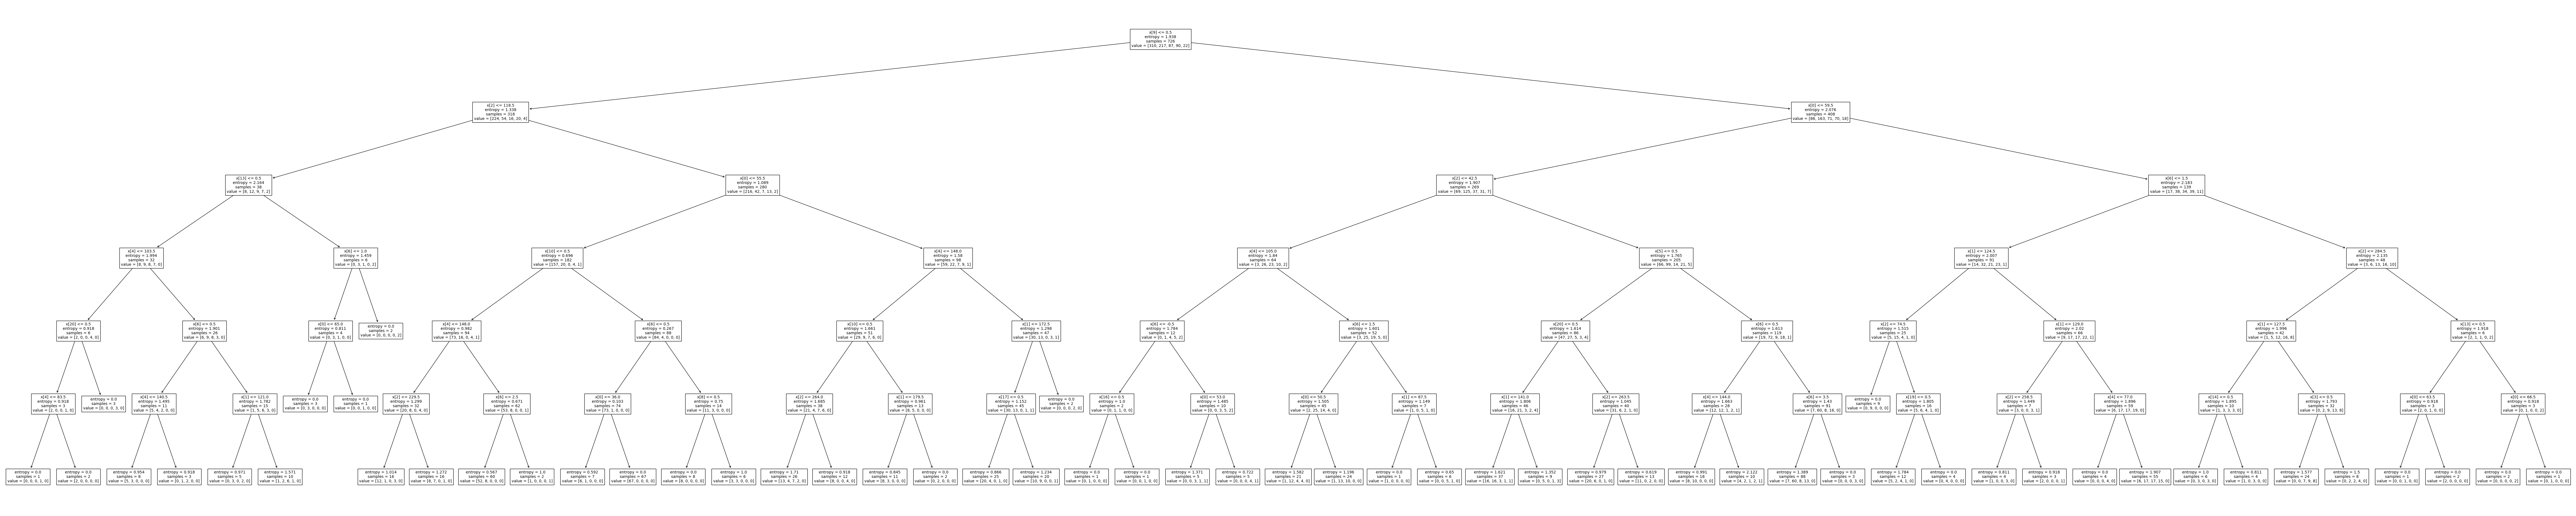

In [351]:
# Remove the text above the tree plot
plt.figure(figsize=(120, 24))

# Increase the size of the tree plot
tree.plot_tree(model, fontsize=10)

# Show the plot
plt.show()


In [344]:
len(list(x))

22

In [345]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

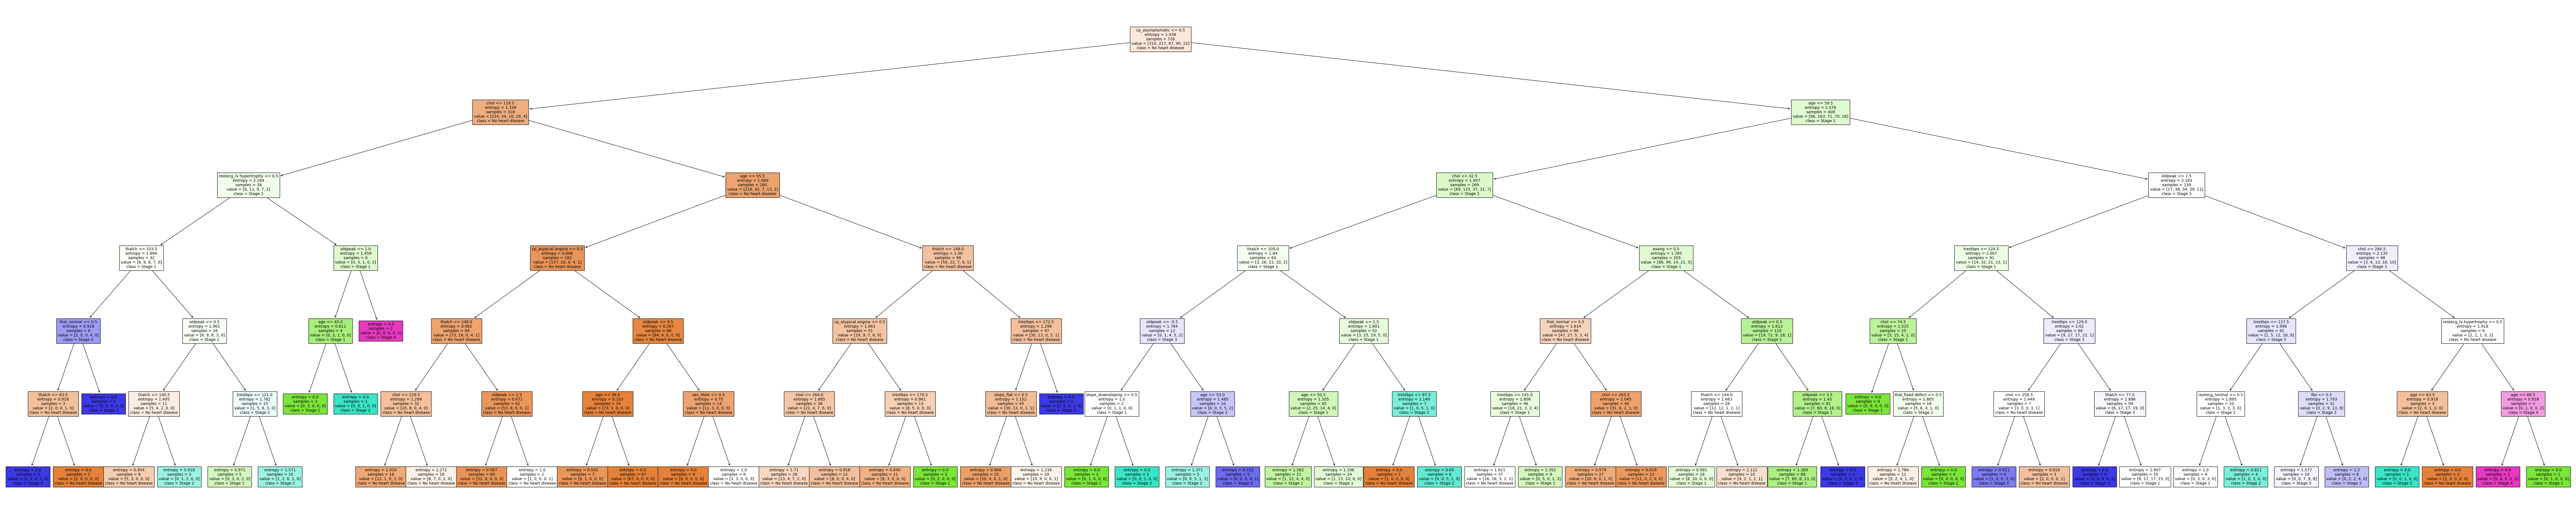

In [350]:
fn = list(x)
cn = ['No heart disease','Stage 1','Stage 2','Stage 3','Stage 4']

plt.figure(figsize=(120, 24))
tree.plot_tree(model,
               fontsize=10,
               feature_names = fn,
               class_names = cn,
               filled = True)
plt.show()

In [303]:
# Predicting on test data

preds = model.predict(x_test) # predicting on test data
pd.Series(preds).value_counts() # getting the count of each category

0    116
1     49
3     11
2      5
4      1
Name: count, dtype: int64

In [304]:
preds

array([0, 3, 0, 3, 1, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       3, 0, 1, 0, 0, 3, 3, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 2, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 3,
       1, 1, 4, 1, 1, 0])

In [305]:
# make 2 way table to understand correct and wrong prediction
pd.crosstab(y_test, preds)

col_0,0,1,2,3,4
num,,,,,
0,79,5,4,1,0
1,25,20,0,3,0
2,5,13,0,4,0
3,6,9,0,1,1
4,1,2,1,2,0


In [306]:
# Accuracy

np.mean(preds == y_test) * 100

54.94505494505495

# Apply Feature Selection to Identify Important Features

In [307]:
model.feature_importances_

array([0.11384588, 0.09971462, 0.16802465, 0.01161002, 0.1047767 ,
       0.04811419, 0.11783639, 0.        , 0.00695106, 0.20795573,
       0.02966336, 0.        , 0.        , 0.02132569, 0.02429675,
       0.        , 0.        , 0.00846493, 0.        , 0.01581513,
       0.0216049 , 0.        ])

In [308]:
feature_imp = pd.Series(model.feature_importances_, index=fn).sort_values(ascending=False)
feature_imp

cp_asymptomatic             0.207956
chol                        0.168025
oldpeak                     0.117836
age                         0.113846
thalch                      0.104777
trestbps                    0.099715
exang                       0.048114
cp_atypical angina          0.029663
restecg_normal              0.024297
thal_normal                 0.021605
restecg_lv hypertrophy      0.021326
thal_fixed defect           0.015815
fbs                         0.011610
slope_flat                  0.008465
sex_Male                    0.006951
slope_upsloping             0.000000
cp_non-anginal              0.000000
slope_downsloping           0.000000
restecg_st-t abnormality    0.000000
cp_typical angina           0.000000
sex_Female                  0.000000
thal_reversable defect      0.000000
dtype: float64

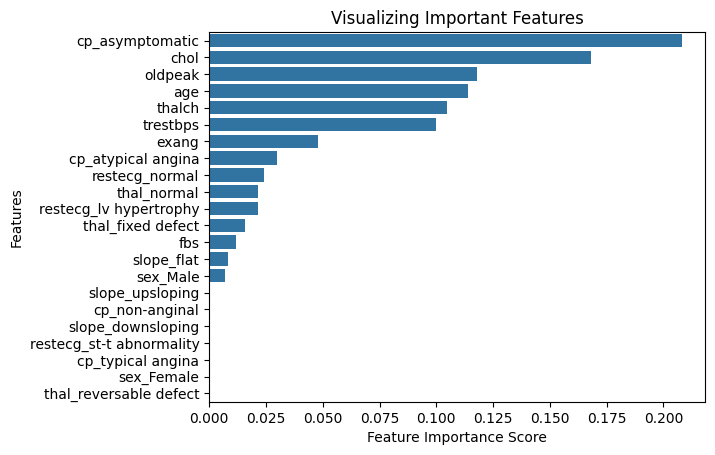

In [309]:
# Creating bar plot to identify the importance of each feature

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

- Accroding to C5.0 model last 7 features are not important & their feature imp. score is also 0

# Building Decision Tree Model using CART [Gini Criteria]

In [310]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3)

In [311]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [312]:
# Prediction and computing Accuracy

pred= model.predict(x_test)
np.mean(preds==y_test) *100

54.94505494505495

## Identify Important Features in CART Classification Model

In [313]:
model_gini.feature_importances_

array([0.1492486 , 0.04360232, 0.1321949 , 0.        , 0.0273891 ,
       0.08598216, 0.        , 0.        , 0.        , 0.56158294,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [314]:
feature_imp = pd.Series(model_gini.feature_importances_, index=fn).sort_values(ascending=False)
feature_imp

cp_asymptomatic             0.561583
age                         0.149249
chol                        0.132195
exang                       0.085982
trestbps                    0.043602
thalch                      0.027389
restecg_normal              0.000000
thal_normal                 0.000000
thal_fixed defect           0.000000
slope_upsloping             0.000000
slope_flat                  0.000000
slope_downsloping           0.000000
restecg_st-t abnormality    0.000000
cp_non-anginal              0.000000
restecg_lv hypertrophy      0.000000
cp_typical angina           0.000000
cp_atypical angina          0.000000
sex_Male                    0.000000
sex_Female                  0.000000
oldpeak                     0.000000
fbs                         0.000000
thal_reversable defect      0.000000
dtype: float64

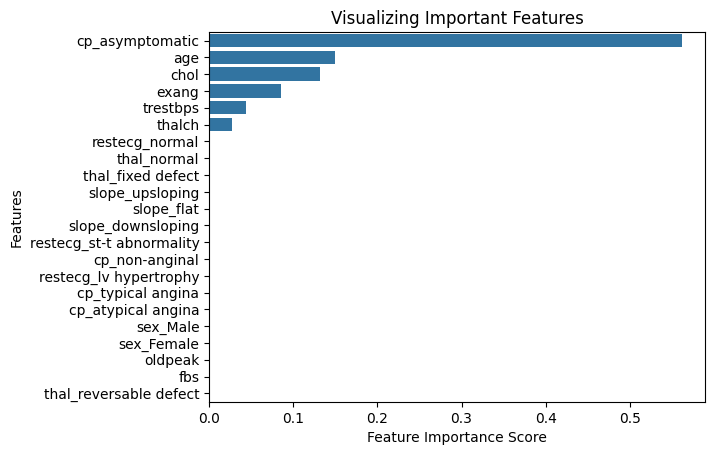

In [346]:
# Creating bar plot to identify the importance of each feature

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

- Accroding to CART Classification Model only first 6 features are important

# **Interview Questions:**

## 1Q. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

**1. Maximum depth:**
  - This parameter controls the depth of the decision tree.
  - A larger maximum depth will result in a more complex tree that can capture more complex relationships in the data, but it can also lead to overfitting.

**2. Minimum samples per leaf:**
- This parameter controls the minimum number of data points that must be in a leaf node.
- A larger minimum samples per leaf will result in a simpler tree that is less likely to overfit, but it can also lead to underfitting.

**3. Minimum samples per split:**
- This parameter controls the minimum number of data points that must be in a node before it can be split.
- A larger minimum samples per split will result in a simpler tree that is less likely to overfit, but it can also lead to underfitting.

**4. Criterion:**
- This parameter controls the function used to measure the quality of a split.
- The most common criteria are the Gini impurity and the entropy.




##  2Q. What is the difference between the Label encoding and One-hot encoding?

Label Encoding :
- It is used to assign positive numbers for all the categorical variables
- Main problem in this technique is, Since there are different numbers in the same column.
- Model will misunderstand the data to be in some kind of order

One Hot Encoding:
- Categorical variables have to be converted to numerical using a method called One-hot encoding
- `pd.get_dummies(df)` can be used to perform One hot encoding
